# 输入单个文件, 手工设置模型类型, 输出

In [1]:
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots

import sys
import os
# import detector
from adtk.visualization import plot
from adtk.data import validate_series
from adtk.detector import LevelShiftAD, PersistAD, SeasonalAD, VolatilityShiftAD
from adtk.aggregator import OrAggregator


# Set directories for data

In [2]:
# file for drive
def filepathRZ(option=1):
    if option ==1: 
        DATA_FOLDER="/content/drive/MyDrive/for_students/data_v1/training/"
        DATA_FOLDER2="/content/drive/MyDrive/for_students/data_v1/"
        DATA_FOLDER3="/content/drive/MyDrive/for_students/data_v2/training/"
        DATA_FOLDER4="/content/drive/MyDrive/for_students/data_v2/"
        DATA_FOLDER5='/content/drive/MyDrive/for_students//Submission/data_v2/'
        return DATA_FOLDER, DATA_FOLDER2, DATA_FOLDER3, DATA_FOLDER4, DATA_FOLDER5
    
    elif option==2:
# file for local
        DATA_FOLDER = sys.path[0] + '/data_v1/training/' # v1 training数据
        DATA_FOLDER2 = sys.path[0] + '/data_v1/' # v1 预测数据
        DATA_FOLDER3 = sys.path[0] + '/data_v2/training/' # v2 training数据
        DATA_FOLDER4 = sys.path[0] + '/data_v2/' # v2 预测数据
        DATA_FOLDER5 = sys.path[0] + '/Submission/data_v2/' # 输出预测路径
        return DATA_FOLDER, DATA_FOLDER2, DATA_FOLDER3, DATA_FOLDER4, DATA_FOLDER5
    
DATA_FOLDER, DATA_FOLDER2, DATA_FOLDER3, DATA_FOLDER4, DATA_FOLDER5= filepathRZ(2)

# set up

In [3]:
def read_for_adtk( folder_name, file_name ):#读取csv文件
    df = pd.read_csv('%s'%folder_name + '%s'%file_name, index_col = ['timestamp'],  parse_dates=True, squeeze=True)
    try:
        df = df.drop(['request_count'], axis=1)
    except:
        print('non')
    return df

In [4]:
def load_file(folder_path, file_name):
    df = read_for_adtk(folder_path, file_name)
    s_train = validate_series(df)
    return df, s_train

In [5]:
from adtk.pipe import Pipenet

In [12]:
# data 为 adtk validate_series
def detect_anomaly( data, mode = 'LevelShift'):
    
    if mode == 'LevelShift':
        print('mode is', mode)
        dect = LevelShiftAD(20)
    elif mode == 'Persist':
        print('mode is', mode)
        dect = PersistAD(window = 1150)
    elif mode == 'Seasonal':
        print('mode is', mode)
        dect = SeasonalAD()
    elif mode == 'VolatilityShift':
        print('mode is', mode)
        dect = VolatilityShiftAD(window = 25)
    elif mode == 'PersistLevelShiftMixed':
        # detect levelshift and persist(spike) anomaly simultaneously
        # 为什么连接之后, 数据少了dataset4  22695->22683
        steps = {
            'levelshift': {
                'model': LevelShiftAD(80),
                "input": "original"
            },
            'persist':{
                'model': PersistAD(window = 1150),
                "input": "original"
            },
            'mixed':{
                'model': OrAggregator(),
                "input": ["levelshift", "persist"]
            }
        }
        dect = Pipenet(steps)
        
    anomalies = dect.fit_detect(data)
    # plot
    plot(data, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
    return anomalies

In [7]:
def output_result(folder_path, file_name, original_df, anomaly, replace = False ):
    if replace == True:
        final_path = folder_path + file_name
    else:
        final_path = folder_path + 'res_' + file_name
    print(final_path)
    # 修改anomaly的名字(原先为数据名)
    anomaly.name = 'anomaly_label'
    # 填充空值
    anomaly = anomaly.fillna(value = 0)
    print(anomaly[anomaly == '1'])
    # 修改为int
    anomaly = anomaly.astype(int) 
    # 两表连接
    anomaly = anomaly[~anomaly.index.duplicated()]
    original_df = original_df[~original_df.index.duplicated()]
    out = pd.concat([original_df, anomaly], axis = 1)
    # 输出
    out.to_csv(final_path, index=True)

In [8]:
def individual(folder_name, file, mode, replace, factors = []):
    df, s_train = load_file( DATA_FOLDER4, file)
    anomalies = detect_anomaly(s_train, mode )
    output_result(DATA_FOLDER4, file, df, anomalies, replace)

In [9]:
# test
mode_dict = {'dataset_1.csv': 'LevelShift',
             'dataset_2.csv': 'LevelShift',
             'dataset_3.csv': 'LevelShift', 
             'dataset_4.csv': 'PersistLevelShiftMixed', 
             'dataset_5.csv': 'LevelShift',
             'dataset_6.csv': 'LevelShift',
             'dataset_7.csv': 'LevelShift',
             'dataset_8.csv': 'Seasonal', 
             'dataset_9.csv': 'VolatilityShift', 
             'dataset_10.csv': 'LevelShift',
             'dataset_11.csv': 'Seasonal',
             'dataset_12.csv': 'VolatilityShift',
             'dataset_13.csv': 'Seasonal', 
             'dataset_100.csv': 'LevelShift',
             'dataset_101.csv': 'LevelShift',
             'dataset_102.csv': 'LevelShift',
             'dataset_103.csv': 'LevelShift',
             'dataset_105.csv': 'LevelShift',
             'dataset_106.csv': 'LevelShift',
            }

res_dataset_8.csv
something wrong about res_dataset_8.csv
res_dataset_9.csv
something wrong about res_dataset_9.csv
dataset_106.csv
mode is LevelShift
/Users/jarrywang/Documents/Job/Huawei/soybean/data_v2/res_dataset_106.csv
                           kpi_value
timestamp                           
2020-08-17 02:00:00+02:00        NaN
2020-08-17 02:06:00+02:00        NaN
2020-08-17 02:08:00+02:00        NaN
2020-08-17 02:09:00+02:00        NaN
2020-08-17 02:15:00+02:00        NaN
...                              ...
2020-08-31 01:55:00+02:00        NaN
2020-08-31 01:56:00+02:00        NaN
2020-08-31 01:57:00+02:00        NaN
2020-08-31 01:58:00+02:00        NaN
2020-08-31 02:00:00+02:00        NaN

[14121 rows x 1 columns]
res_dataset_102.csv
something wrong about res_dataset_102.csv
res_dataset_103.csv
something wrong about res_dataset_103.csv
dataset_105.csv
mode is LevelShift
/Users/jarrywang/Documents/Job/Huawei/soybean/data_v2/res_dataset_105.csv
                           kpi_valu

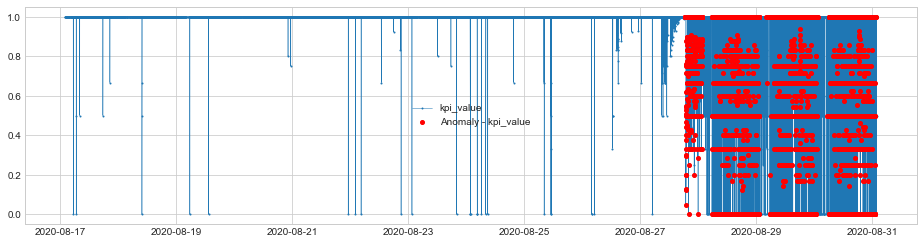

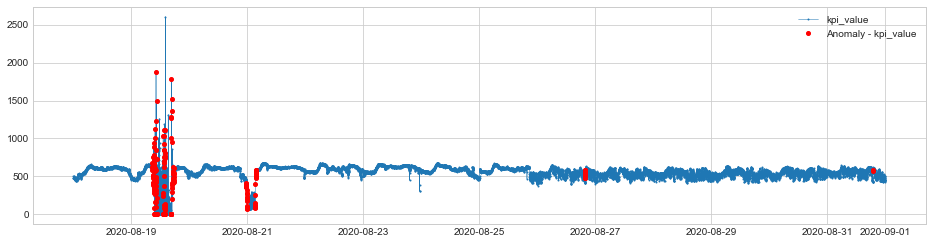

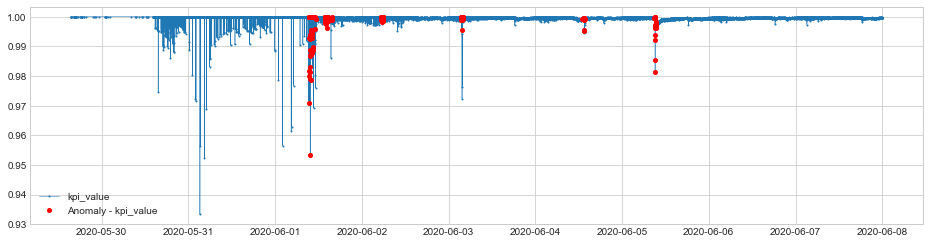

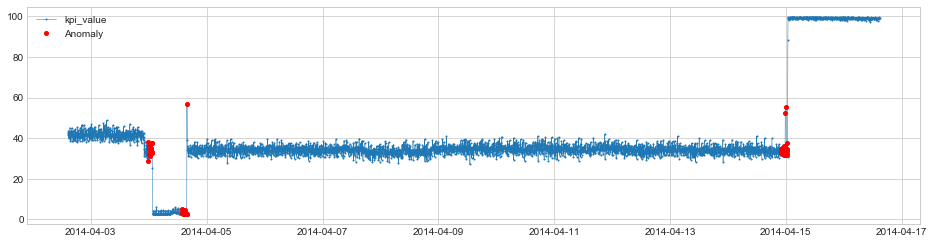

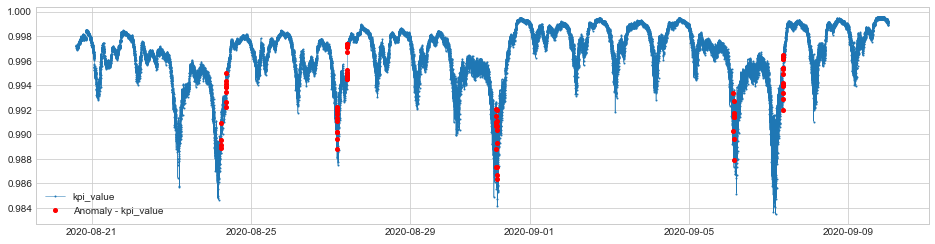

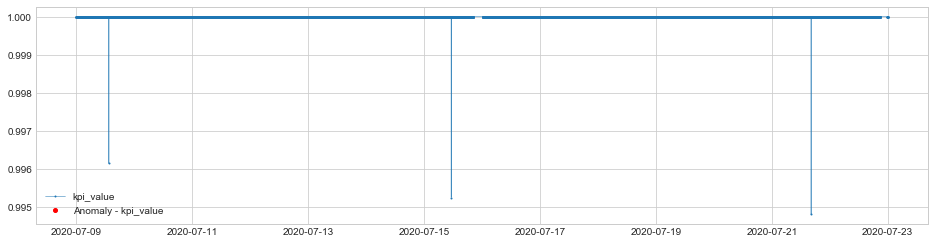

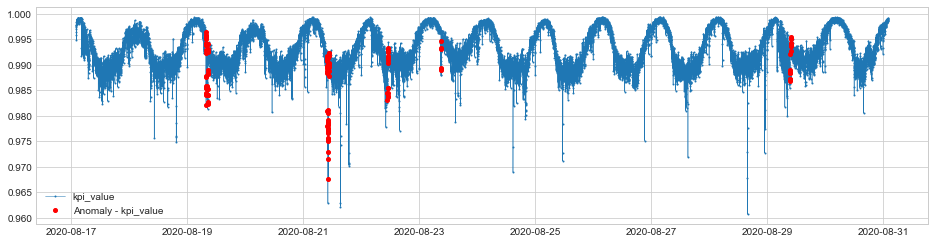

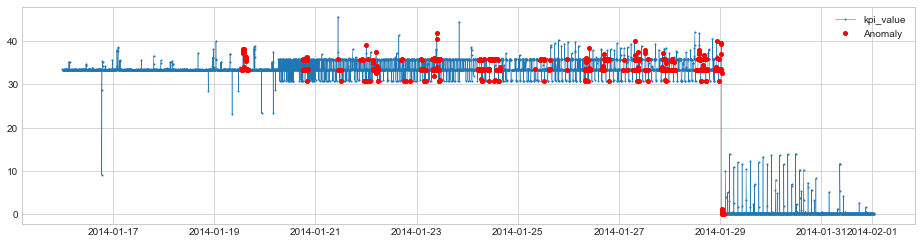

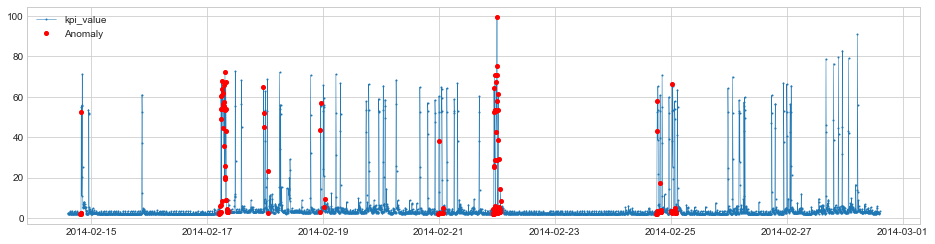

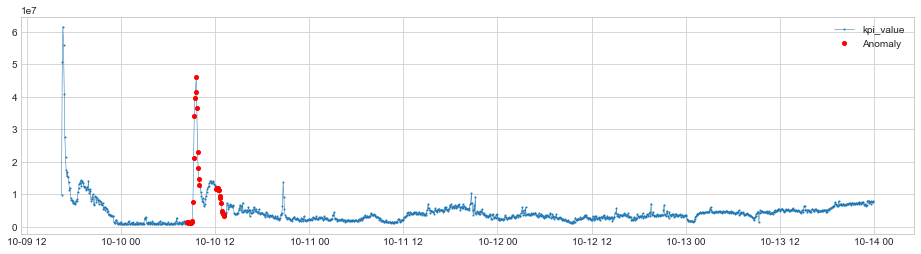

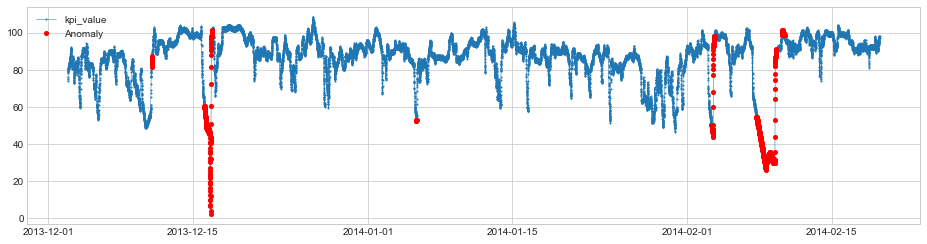

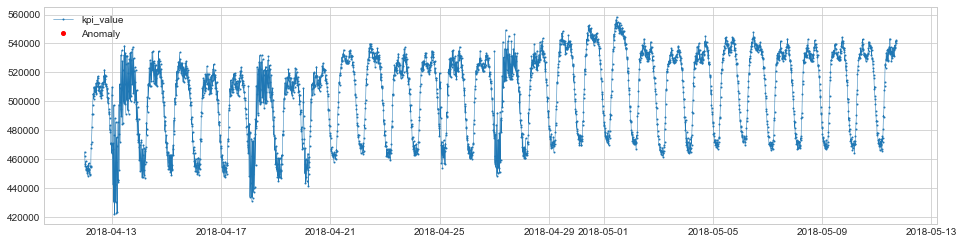

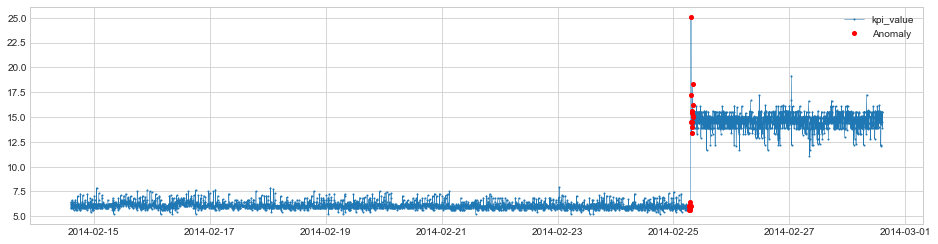

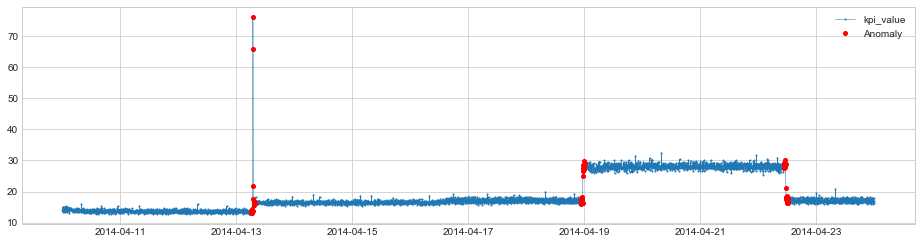

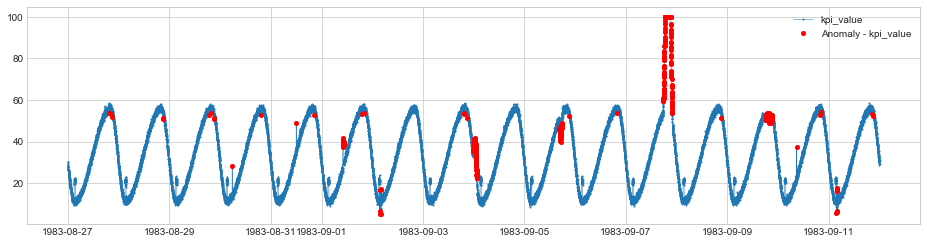

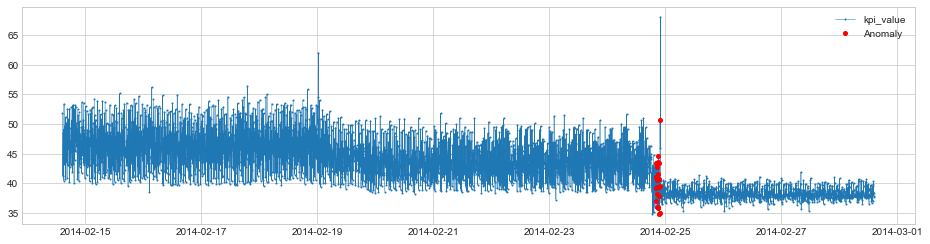

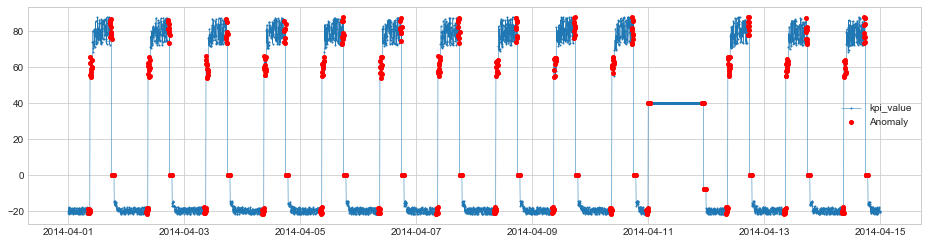

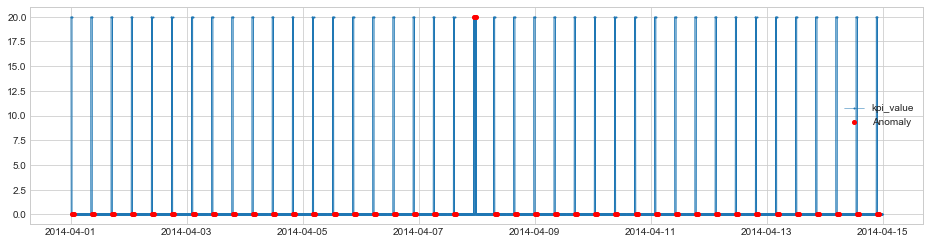

In [13]:
all_files = os.listdir(DATA_FOLDER4)

# four mode: LevelShift, Persist, Seasonal, VolatilityShift, PersistLevelShiftMixed
for file_name in all_files:
        if file_name[-4:] == '.csv':
            print(file_name)
            try:
                mode = mode_dict[file_name]
                individual(DATA_FOLDER4, file_name, mode, replace = False)
            except:
                print('something wrong about', file_name)
                continue